<a href="https://colab.research.google.com/github/Parvez13/Adult_Income_Census_Prediction/blob/master/news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
# !pip install -U -q segmentation-models
# !pip install -q tensorflow==2.5.0
# !pip install -q keras==2.4.0
# !pip install -q tensorflow-estimator==2.5.0

In [291]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy
import nltk
import logging
import matplotlib.pyplot as plt
%matplotlib inline

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split



## Imports libs
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
# os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
# import segmentation_models as sm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [292]:
tf.__version__

'2.7.0'

In [293]:
keras.__version__

'2.7.0'

In [294]:
logging.basicConfig(filename='logs/logs.txt',
                    filemode='a',
                    format='%(asctime)s %(message)s',
                    datefmt="%Y-%m-%d %H:%M:%S")

In [295]:
#Logging
logging.warning('Load Dataset')
# Load dataset
df = pd.read_csv("BBC_News_Train.csv")
#df2 = pd.read_csv("Dataset/BBC_News_Test.csv")

# Check head
logging.warning('Check Head')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [296]:
# Check tail
logging.warning('Check Tail')
df.tail()

,ArticleId,Text,Category
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech
1489,538,santy worm makes unwelcome visit thousands of ...,tech


In [297]:
# Info
logging.warning('Info')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [298]:
# Describe
logging.warning('Describe')
df.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [299]:
# Checking any null values
logging.warning('Checking Null Values')
df.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [300]:
df.shape

(1490, 3)

In [301]:
# Value counts
logging.warning('Check value counts for Category')
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [302]:
# Preprocessing
logging.warning("-"*100)
logging.warning('Preprocessing')


In [303]:
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [304]:
df_shuffled = df.sample(frac=1,random_state=42)
df_shuffled

,ArticleId,Text,Category
941,2160,wal-mart is sued over rude lyrics the parents ...,entertainment
297,1360,howard taunts blair over splits tony blair s f...,politics
271,302,fox attacks blair s tory lies tony blair lie...,politics
774,864,online commons to spark debate online communit...,tech
420,2184,piero gives rugby perspective bbc sport unveil...,tech
...,...,...,...
1130,193,blair said he would stand down tony blair pr...,politics
1294,111,us trade gap hits record in 2004 the gap betwe...,business
860,833,tories pledge free sports lessons children wou...,politics
1459,2206,dance music not dead says fatboy dj norman coo...,entertainment


In [305]:
# text
text = df_shuffled['Text'].to_numpy()
# Category
category = df_shuffled['Category'].to_numpy()

In [306]:
!pip install tensorflow_text

In [307]:
category

array(['entertainment', 'politics', 'politics', ..., 'politics',
       'entertainment', 'sport'], dtype=object)

In [313]:
logging.warning("Labels One Hot")

In [314]:
# One Hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse=False)
labels_one_hot = one_hot.fit_transform(category.reshape(-1,1))
labels_one_hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [315]:
logging.warning("Labels encoded")

In [316]:
# Labels encode
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(category)
labels_encoded[:20]

array([1, 2, 2, 4, 4, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 4, 0, 3, 2, 0])

In [317]:
# Get class names and number of classes from labelencoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['business', 'entertainment', 'politics', 'sport', 'tech'],
       dtype=object))

In [318]:
# replace category into numerical
# df['Category'].replace({'sport':1,
#                       'business':2,
#                       'politics':3,
#                       'entertainment':4,
#                       'tech':5},
#                      inplace=True,
#                      regex=True)


In [319]:
# label = df['Category'].to_numpy()
# label

In [320]:
logging.warning("-"*100)
logging.warning('Splitting')

train_sentences,val_sentences,train_labels,val_labels = train_test_split(df_text,
                                                                        labels_encoded,
                                                                        random_state=42,
                                                                        test_size=0.2)

In [321]:
logging.warning("-"*100)

In [322]:
train_sentences[:10], train_labels[:10]

(array(['faith schools citizenship warning schools must improve the quality of citizenship lessons - or social cohesion and democracy will suffer  says the education watchdog.  independent faith schools were singled out by ofsted chief  david bell  for not doing enough to promote the  wider tenets of british society . mr bell said muslim  jewish and evangelical christian schools must be  intolerant of intolerance . diversity  certainly must not mean segregated or separate   he said. mr bell s speech called for a much greater effort in all types of schools to teach citizenship - with an accompanying survey showing that young people knew little about politics and had no enthusiasm to find out more.  badly-taught citizenship lessons have previously been criticised by mr bell  and in a speech to the hansard society  he warned that it was failing to pass on an understanding of democracy  public service and shared values. he highlighted his particular concern for citizenship in the growing n

In [323]:
train_sentences_r = tf.ragged.constant(train_sentences)
val_sentences_r = tf.ragged.constant(val_sentences)

In [324]:
logging.warning("Create a baseline model")

In [325]:
# Create a baseline model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Set random seed
tf.random.set_seed(52)

# Create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [326]:
logging.warning("Evaluate baseline model")
model_0.score(val_sentences, val_labels)

0.9362416107382551

In [327]:
logging.warning("Make predictions")

In [328]:
# Make prediction
baseline_predictions = model_0.predict(val_sentences)
baseline_predictions

array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 3, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 3, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 4, 0, 1, 4, 0, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 3, 3, 0, 3, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 2, 0, 2, 4, 2, 0, 0, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 2, 0, 0, 3, 4, 2, 2, 3, 0, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 3, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 2, 2,
       0, 2, 2, 4, 0, 0, 3, 3, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 0, 3, 3, 2, 0, 0, 0, 4, 2])

In [329]:
sample_text = ["Australia won the T20 Worldcup 2021 beating New Zealand by 8 wickets"]
model_0.predict(sample_text)

array([3])

In [330]:
sample_text = ["United States President Joe Biden and China’s President Xi Jinping on Tuesday agreed on the need to “responsibly” manage a competitive relationship but did not arrive at any significant breakthrough on any of the thorny issues that have led to increasingly confrontational ties."]
model_0.predict(sample_text)

array([0])

In [331]:
sample_text = ["YSRCP party leading in the Nellor Elections"]
model_0.predict(sample_text)

array([2])

In [332]:
sample_text = ["""
"Support To Terrorists State Policy": India Slams Pak At UN Over Kashmir

"""]
model_0.predict(sample_text)

array([0])

In [333]:
sample_text = ["Spider-Man No Way Home trailer: Tom Holland’s MCU film is the cinematic event of the year; meet Sinister Six"]
model_0.predict(sample_text)

array([1])

In [334]:
sample_text = ["Google: US technology giant to invest $740m in Australia"]
model_0.predict(sample_text)

array([4])

In [335]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluation_metrics(y_true, y_pred):
    
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    
    """
    
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true,y_pred)
    
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results

In [336]:
logging.warning("Evaluation metrics using baseline model ")
baseline_results = evaluation_metrics(val_labels,baseline_predictions)
baseline_results

{'accuracy': 0.9362416107382551,
 'f1': 0.9355904724579887,
 'precision': 0.940138821673615,
 'recall': 0.9362416107382551}

In [337]:
# Preparing our data for deep sequence models

In [338]:
sent_lens = [len(sentence.split()) for sentence in train_sentences ]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

381.6090604026846

In [339]:
logging.warning("-"*100)
logging.warning('Converting Text Into Numbers For Tokenization')
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# max_length
max_length = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
max_length

382

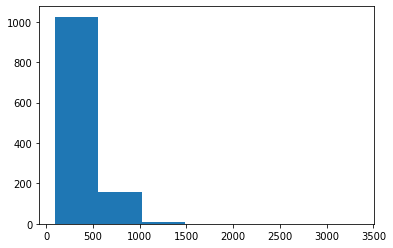

In [340]:
plt.hist(sent_lens, bins=7);

In [341]:
# How long of sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

714

In [342]:
max(sent_lens)

3345

In [343]:
max_tokens = 100000

In [344]:
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_mode="int",
                                    output_sequence_length=output_seq_len)

In [345]:
text_vectorizer.adapt(train_sentences)


In [346]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 714), dtype=int64, numpy=
array([[    1,     6, 20993,     7,   135,   668,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [347]:
# Choose a random sentence from the training dataset and tokenize it
import random
random_sentence = random.choice(train_sentences_r)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
b'jowell confirms casino climbdown tessa jowell has announced plans to limit the number of new casinos in the uk to 24  in a move branded a  humiliating retreat  by the tories.  it puts an end to plans for up to 40 super casinos  originally outlined in the government s gambling bill. instead there will be a cap of eight new casinos in each size category - small  medium and large. the culture secretary said the move showed she listened to critics who feared an explosion in gambling.  but conservative shadow culture secretary john whittingdale said the way the government had handled the bill was a  shambles .  this announcement is a further humiliating retreat by the government.  instead of the initial intention of the gambling bill  to liberalise the rules governing gambling  the bill now imposes a more restrictive regime than exists at present.  shares in british casino operators london clubs international  rank group and stanley leisure  who had been hoping the bill wou

<tf.Tensor: shape=(1, 714), dtype=int64, numpy=
array([[ 3854,  7481,  3930, 22576,  7863,  3854,    20,   476,   179,
            3,  1716,     2,   106,     4,    47,  3929,     7,     2,
           73,     3,  1038,     7,     6,   267,  3937,     6, 13076,
         6954,    24,     2,   415,    12,  3413,    33,   176,     3,
          179,     9,    48,     3,   813,  1808,  3929,  1823,  4735,
            7,     2,    72,     8,  3674,   384,   653,    52,    23,
           17,     6,  2757,     4,   722,    47,  3929,     7,   400,
         1446,  1353,   454,  4097,     5,   651,     2,  1651,   355,
           14,     2,   267,   735,    76, 12741,     3,   839,    45,
         5255,    33,  4827,     7,  3674,    25,   854,  1154,  1651,
          355,   343, 15181,    14,     2,   116,     2,    72,    38,
         5224,     2,   384,    15,     6,  9446,    35,  1473,    10,
            6,   402, 13076,  6954,    24,     2,    72,   653,     4,
            2,  2094,  3257, 

In [348]:
vocab = text_vectorizer.get_vocabulary()
len(vocab)

24905

In [349]:
logging.warning('Embedding Layer')

In [350]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=len(vocab), # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                            # input_length=max_length, # how long is each input
                             mask_zero=False,
                             name="embedding_1") 

embedding

In [351]:
# Get a random sentence from training set
import random
random_sentence = random.choice(train_sentences_r)
print(f"Original text:\n{random_sentence}\
      \n\nTokenization : \n{text_vectorizer([random_sentence])}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
b'yukos accused of lying to court russian oil firm yukos lied to a us court in an attempt to stop the russian government selling off its key production unit  the court has heard.  the unit  yugansk  was sold to pay off a $27.5bn (\xc2\xa314.5bn) back tax bill. yukos argued that since it had a us subsidiary and local bank accounts  the us court could declare it bankrupt and stop the auction of yugansk. but deutsche bank - itself a target of a yukos lawsuit - said documents had been backdated to strengthen the case.  deutsche bank s evidence came on the first day of a two-day hearing in houston. its lawyer  hugh ray  told the court that yukos had claimed it had transferred $27m into two texas bank accounts opened by its new us subsidiary. by doing so  he said  the firm had intended to reinforce its us presence - and thus its chances of getting its case heard in us courts. but he said that the papers documenting the transaction were not drawn up till weeks after yukos made 

<tf.Tensor: shape=(1, 714, 128), dtype=float32, numpy=
array([[[ 0.04585798, -0.02728413, -0.01005446, ...,  0.03942828,
         -0.01244868, -0.01237205],
        [ 0.03719515, -0.00534731,  0.04295224, ..., -0.03597443,
          0.02071606, -0.03299811],
        [-0.04364428,  0.02437404, -0.03696011, ..., -0.04763393,
          0.02931459,  0.0068561 ],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [352]:
logging.warning('Create Tensorboard Callback')
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    """
    Creates a TensorBoard callback instand to store log files.
    
    Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
    
    Args:
      dir_name: target directory to store TensorBoard log files
      experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    
    """
    
    log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir = log_dir
    )
    
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [353]:
logging.warning("Early Stopping Callbacks")
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=3)

In [354]:
logging.warning("-"*100)
logging.warning("Simple Dense Model")

In [355]:
logging.warning("Create Dataset using `tf.data.Dataset` for training and validation")

In [356]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences_r, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences_r, val_labels))

train_dataset, val_dataset

(<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 <TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>)

In [357]:
logging.warning("Prefetch batch using `tf.data.AUTOTUNE`")
train_dataset = train_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset =   val_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

train_dataset, val_dataset

(<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>,
 <PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>)

In [358]:
# Build model with the Functional API
from tensorflow.keras import layers
from tensorflow.keras.layers import  Dense, GlobalAveragePooling1D

# Set random seed
tf.random.set_seed(452)

# Construct model
inputs = layers.Input(shape=(1,), dtype=tf.string,ragged=True) 
text_vectorization_layer = text_vectorizer(inputs) 
embedding_layer = embedding(text_vectorization_layer) 
global_average_pooling_layer = layers.GlobalAveragePooling1D()(embedding_layer) 
outputs = layers.Dense(num_classes, activation="softmax")(global_average_pooling_layer) 
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 714)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 global_average_pooling1d_11  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_21 (Dense)            (None, 5)                 645       
                                                                 
Total params: 3,188,485
Trainable params: 3,188,485
N

In [359]:
logging.warning("Fit and train model")

In [360]:
# Fit
history_1 = model_1.fit(train_dataset,
                       epochs=5,
                       validation_data=val_dataset,
                       callbacks=[early_stopping_callback,
                                 create_tensorboard_callback(dir_name='Model_logs',
                                                            experiment_name='simple_dense_model')])

Saving TensorBoard log files to: Model_logs/simple_dense_model/20211128-031025
Epoch 1/5
38/38 [==============================] - 1s 22ms/step - loss: 1.5906 - accuracy: 0.3909 - val_loss: 1.5601 - val_accuracy: 0.4631
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 1.5376 - accuracy: 0.4807 - val_loss: 1.4977 - val_accuracy: 0.5403
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 1.4691 - accuracy: 0.5386 - val_loss: 1.4164 - val_accuracy: 0.6577
Epoch 4/5
38/38 [==============================] - 1s 18ms/step - loss: 1.3784 - accuracy: 0.6208 - val_loss: 1.3188 - val_accuracy: 0.7047
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 1.2688 - accuracy: 0.6946 - val_loss: 1.2117 - val_accuracy: 0.7383


In [361]:
logging.warning("Evaluate model_1 on val_dataset")
model_1.evaluate(val_dataset)

10/10 [==============================] - 0s 7ms/step - loss: 1.2117 - accuracy: 0.7383


[1.2117449045181274, 0.7382550239562988]

In [362]:
logging.warning("Make prediction using simple dense model")

In [363]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs


array([[0.23281929, 0.29177478, 0.1147351 , 0.2842985 , 0.0763724 ],
       [0.21276124, 0.3368662 , 0.12615632, 0.23565072, 0.08856554],
       [0.2363207 , 0.23289981, 0.11154401, 0.3508876 , 0.06834788],
       ...,
       [0.32061094, 0.15247129, 0.17423536, 0.18107481, 0.17160766],
       [0.14969335, 0.07568391, 0.21736792, 0.08588349, 0.47137126],
       [0.17812768, 0.14570095, 0.33635208, 0.18901469, 0.15080465]],
      dtype=float32)

In [364]:
model_1_preds = tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 1, 2, 3, 0, 3, 3, 0,
       0, 4, 3, 3, 3, 2, 3, 3, 2, 3, 3, 0, 0, 0, 2, 0, 0, 3, 3, 3, 4, 3,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 0, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 0, 2, 3, 0, 3, 0, 3, 2, 0, 0, 3, 3, 0, 0,
       0, 4, 3, 1, 3, 4, 4, 0, 3, 3, 2, 2, 0, 2, 3, 3, 1, 0, 2, 4, 3, 0,
       3, 2, 3, 3, 0, 0, 3, 4, 0, 1, 4, 0, 0, 3, 0, 4, 3, 2, 3, 0, 2, 3,
       3, 0, 3, 4, 4, 3, 0, 0, 3, 3, 4, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3,
       1, 3, 0, 3, 2, 3, 3, 2, 3, 3, 0, 3, 4, 2, 0, 4, 2, 0, 3, 2, 4, 0,
       0, 4, 0, 0, 4, 4, 4, 3, 2, 3, 0, 4, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       2, 4, 0, 3, 3, 4, 0, 0, 4, 3, 0, 0, 3, 4, 2, 2, 3, 0, 0, 3, 4, 4,
       0, 3, 3, 4, 3, 0, 3, 3, 2, 0, 4, 3, 2, 4, 4, 2, 4, 3, 2, 3, 0, 0,
       3, 4, 3, 0, 4, 0, 3, 3, 4, 1, 4, 3, 3, 3, 4, 3, 0, 4, 0, 0, 4, 0,
       0, 2, 2, 4, 0, 0, 3, 2, 4, 0, 3, 3, 0, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [365]:
logging.warning("Evaluate using simple dense model")

In [366]:
# Calculate model_1 metrics
model_1_results = evaluation_metrics(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 0.738255033557047,
 'f1': 0.7031040637698016,
 'precision': 0.803971563751046,
 'recall': 0.738255033557047}

In [367]:
logging.warning("-"*100)
logging.warning("Model 2 Conv1D")

In [368]:
# Set random seed
tf.random.set_seed(42)


# Create Conv1D model
inputs = layers.Input(shape=(1,),dtype='string',ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.Conv1D(64, 5, padding='same', activation='relu')(embedding_layer)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model_2 = tf.keras.Model(inputs,outputs,name='model_2_Conv1D')

# Compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

# summary 
model_2.summary()

Model: "model_2_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 714)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 conv1d_2 (Conv1D)           (None, 714, 64)           41024     
                                                                 
 global_average_pooling1d_12  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_22 (Dense)            (None, 5)              

In [369]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [370]:
logging.warning("Fit and train model")
history_2 = model_2.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                 create_tensorboard_callback(dir_name='Model_logs',
                                                            experiment_name='model_2_Conv1d')])

Saving TensorBoard log files to: Model_logs/model_2_Conv1d/20211128-031031
Epoch 1/5
38/38 [==============================] - 2s 31ms/step - loss: 1.2857 - accuracy: 0.7064 - val_loss: 1.0097 - val_accuracy: 0.7349
Epoch 2/5
38/38 [==============================] - 1s 22ms/step - loss: 0.7457 - accuracy: 0.8591 - val_loss: 0.6198 - val_accuracy: 0.8926
Epoch 3/5
38/38 [==============================] - 1s 23ms/step - loss: 0.3980 - accuracy: 0.9480 - val_loss: 0.3816 - val_accuracy: 0.9262
Epoch 4/5
38/38 [==============================] - 1s 22ms/step - loss: 0.2078 - accuracy: 0.9815 - val_loss: 0.2540 - val_accuracy: 0.9497
Epoch 5/5
38/38 [==============================] - 1s 21ms/step - loss: 0.1168 - accuracy: 0.9916 - val_loss: 0.1903 - val_accuracy: 0.9564


In [371]:
logging.warning("Evaluate using model_2 on val_dataset")
model_2.evaluate(val_dataset)

10/10 [==============================] - 0s 9ms/step - loss: 0.1903 - accuracy: 0.9564


[0.19032272696495056, 0.9563758373260498]

In [372]:
logging.warning("Make prediction with Conv1D model")

In [373]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred_probs

array([[5.9423042e-03, 9.5494246e-01, 9.2833936e-03, 2.0699628e-02,
        9.1321766e-03],
       [1.4363864e-04, 9.9755341e-01, 8.0338184e-04, 1.9063900e-04,
        1.3089109e-03],
       [2.0791017e-02, 7.3765099e-02, 2.6468655e-02, 8.7059158e-01,
        8.3836867e-03],
       ...,
       [9.8919654e-01, 5.9856719e-04, 3.9441199e-03, 1.3854157e-04,
        6.1222413e-03],
       [9.7913481e-04, 7.0150703e-04, 2.5562788e-04, 8.1528361e-07,
        9.9806291e-01],
       [2.1310350e-04, 6.3758617e-04, 9.9895418e-01, 1.0040898e-04,
        9.4655778e-05]], dtype=float32)

In [374]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 1, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 0, 0, 1, 4, 0, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 3, 0, 0, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 4, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 0, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 4, 4, 2, 4, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 2, 2,
       0, 2, 2, 4, 0, 0, 3, 2, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [375]:
logging.warning("Evaluation metrics using Conv1D")


In [376]:
model_2_results = evaluation_metrics(val_labels,
                                     model_2_preds)
model_2_results

{'accuracy': 0.9563758389261745,
 'f1': 0.9560226495196614,
 'precision': 0.9571000659771737,
 'recall': 0.9563758389261745}

In [377]:
logging.warning("-"*100)
logging.warning("Model_3 LSTM")

In [378]:
# Set random seed
tf.random.set_seed(42)


# Build LSTM model
inputs = tf.keras.Input(shape=(1,),dtype=tf.string,ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.LSTM(64,return_sequences=True)(embedding_layer)
x = layers.Dense(128, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs,name='Model_3_LSTM')

# Compile
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Summary
model_3.summary()

Model: "Model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 714)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 lstm_6 (LSTM)               (None, 714, 64)           49408     
                                                                 
 dense_23 (Dense)            (None, 714, 128)          8320      
                                                                 
 global_average_pooling1d_13  (None, 128)              0         
  (GlobalAveragePooling1D)                            

In [379]:
logging.warning("Fit and train model")
history_3 = model_3.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback(dir_name='Model_logs',
                                                               experiment_name='Model_3_LSTM')])

Saving TensorBoard log files to: Model_logs/Model_3_LSTM/20211128-031037
Epoch 1/5
38/38 [==============================] - 9s 165ms/step - loss: 1.1725 - accuracy: 0.6133 - val_loss: 0.7420 - val_accuracy: 0.7987
Epoch 2/5
38/38 [==============================] - 5s 144ms/step - loss: 0.3463 - accuracy: 0.9362 - val_loss: 0.3425 - val_accuracy: 0.9329
Epoch 3/5
38/38 [==============================] - 5s 142ms/step - loss: 0.1567 - accuracy: 0.9757 - val_loss: 0.6285 - val_accuracy: 0.8624
Epoch 4/5
38/38 [==============================] - 5s 136ms/step - loss: 0.4572 - accuracy: 0.8683 - val_loss: 0.3544 - val_accuracy: 0.8993
Epoch 5/5
38/38 [==============================] - 5s 137ms/step - loss: 0.1611 - accuracy: 0.9740 - val_loss: 0.1923 - val_accuracy: 0.9497


In [380]:
logging.warning("Evaluate model_3 on val_dataset")
model_3.evaluate(val_dataset)

10/10 [==============================] - 1s 50ms/step - loss: 0.1923 - accuracy: 0.9497


[0.19225403666496277, 0.9496644139289856]

In [381]:
logging.warning("Make prediction with LSTM model")

In [382]:
model_3_pred_probs = model_3.predict(val_dataset)
model_3_pred_probs

array([[3.1942911e-03, 9.4949746e-01, 3.9439775e-02, 1.2104592e-03,
        6.6579762e-03],
       [4.5058655e-04, 9.8110813e-01, 1.6278021e-02, 1.1361423e-04,
        2.0495879e-03],
       [4.1668206e-02, 3.4237493e-02, 2.0604704e-02, 8.9223111e-01,
        1.1258488e-02],
       ...,
       [9.9321234e-01, 2.2478173e-04, 4.7771949e-03, 5.4499391e-04,
        1.2407548e-03],
       [2.5747376e-03, 2.4871699e-06, 3.2705378e-03, 1.6430977e-06,
        9.9415058e-01],
       [7.7727792e-04, 4.7511216e-03, 9.8991287e-01, 5.2866588e-05,
        4.5058383e-03]], dtype=float32)

In [383]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 4, 4, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 2, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 4, 4, 1, 4, 4, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 4, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 3, 0, 0, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 4, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 4, 2, 0, 1, 0, 0, 0,
       2, 3, 4, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 4, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 2, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 4, 0, 2, 2,
       0, 2, 2, 4, 0, 4, 3, 1, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 2, 2, 0, 3,
     

In [384]:
logging.warning("Evaluation metrics using LSTM")

In [385]:
model_3_results = evaluation_metrics(val_labels,
                                     model_3_preds)
model_3_results

{'accuracy': 0.9496644295302014,
 'f1': 0.9497006912144507,
 'precision': 0.9523289639810494,
 'recall': 0.9496644295302014}

In [386]:
logging.warning("-"*100)
logging.warning("Model 4 GRU")


In [387]:
#  Set random seed
tf.random.set_seed(42)



# Build model
inputs = tf.keras.Input(shape=(1,),dtype=tf.string,ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.GRU(64, return_sequences=True)(embedding_layer)
x = layers.Dense(128,activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_4 = tf.keras.Model(inputs,outputs,name='model_4_GRU')

# Compile
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Summary
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 714)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 gru_2 (GRU)                 (None, 714, 64)           37248     
                                                                 
 dense_25 (Dense)            (None, 714, 128)          8320      
                                                                 
 global_average_pooling1d_14  (None, 128)              0         
  (GlobalAveragePooling1D)                             

In [388]:
logging.warning("Fit and train model")
history_4 = model_4.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback('Model_logs',
                                                               'Model_4_GRU')])

Saving TensorBoard log files to: Model_logs/Model_4_GRU/20211128-031123
Epoch 1/5
38/38 [==============================] - 9s 165ms/step - loss: 1.2982 - accuracy: 0.5906 - val_loss: 0.7931 - val_accuracy: 0.7517
Epoch 2/5
38/38 [==============================] - 6s 150ms/step - loss: 0.3655 - accuracy: 0.9245 - val_loss: 0.2509 - val_accuracy: 0.9262
Epoch 3/5
38/38 [==============================] - 6s 150ms/step - loss: 0.0726 - accuracy: 0.9941 - val_loss: 0.2261 - val_accuracy: 0.9530
Epoch 4/5
38/38 [==============================] - 6s 149ms/step - loss: 0.0328 - accuracy: 0.9950 - val_loss: 0.2592 - val_accuracy: 0.9362
Epoch 5/5
38/38 [==============================] - 6s 150ms/step - loss: 0.0478 - accuracy: 0.9908 - val_loss: 0.1140 - val_accuracy: 0.9664


In [389]:
logging.warning("Evaluate Model 4 on val_dataset")
model_4.evaluate(val_dataset)

10/10 [==============================] - 1s 57ms/step - loss: 0.1140 - accuracy: 0.9664


[0.11397363245487213, 0.9664429426193237]

In [390]:
logging.warning("Make Prediction using model_4 on val_dataset")


In [391]:
model_4_preds = tf.argmax(model_4.predict(val_dataset),axis=1)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3])>

In [392]:
logging.warning("Evaluate metrics ")
model_4_results = evaluation_metrics(val_labels,
                                     model_4_preds)
model_4_results

{'accuracy': 0.9664429530201343,
 'f1': 0.9667219285451137,
 'precision': 0.967597372798715,
 'recall': 0.9664429530201343}

In [393]:
logging.warning("-"*100)
logging.warning("Model 5 Bidirectional LSTM")


In [394]:
# Set random seed
tf.random.set_seed(42)



# Build model
inputs = tf.keras.Input(shape=(1,),dtype=tf.string,ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(embedding_layer)
x = layers.Bidirectional(layers.LSTM(128,return_sequences=True))(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,activation='softmax')(x)
model_5 = tf.keras.Model(inputs,outputs,name='model_5')

# Compile
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Summary
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 714)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 bidirectional_4 (Bidirectio  (None, 714, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 714, 256)         263168    
 nal)                                                            
                                                           

In [395]:
logging.warning("Fit and train model")
history_5 = model_5.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback('Model_logs',
                                                               'Model_5_Bidirectional(LSTM)')])

Saving TensorBoard log files to: Model_logs/Model_5_Bidirectional(LSTM)/20211128-031202
Epoch 1/5
38/38 [==============================] - 30s 501ms/step - loss: 0.5328 - accuracy: 0.8582 - val_loss: 0.3793 - val_accuracy: 0.9027
Epoch 2/5
38/38 [==============================] - 17s 444ms/step - loss: 0.0786 - accuracy: 0.9832 - val_loss: 0.2854 - val_accuracy: 0.9396
Epoch 3/5
38/38 [==============================] - 17s 445ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.1813 - val_accuracy: 0.9530
Epoch 4/5
38/38 [==============================] - 17s 442ms/step - loss: 0.0124 - accuracy: 0.9983 - val_loss: 0.3922 - val_accuracy: 0.9128
Epoch 5/5
38/38 [==============================] - 17s 445ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 0.1213 - val_accuracy: 0.9597


In [396]:
logging.warning("Evaluate model_5 on val_dataset")
model_5.evaluate(val_dataset)

10/10 [==============================] - 2s 150ms/step - loss: 0.1213 - accuracy: 0.9597


[0.1213318333029747, 0.9597315192222595]

In [397]:
logging.warning("Make prediction using Model_5 on val_dataset")
model_5_preds = tf.argmax(model_5.predict(val_dataset),axis=1)
model_5_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 0, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 0, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 1, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 0, 0, 1, 4, 0, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 3, 0, 0, 1, 3, 0, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 0, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 0, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 1, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 1, 2,
       0, 2, 2, 4, 0, 0, 3, 1, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [398]:
logging.warning("Evaluation Metrics")
model_5_results = evaluation_metrics(val_labels,
                                     model_5_preds)
model_5_results

{'accuracy': 0.959731543624161,
 'f1': 0.9597354813800449,
 'precision': 0.9630294069268686,
 'recall': 0.959731543624161}

In [399]:
logging.warning("-"*100)
logging.warning("Model 6 using Transfer Learning")

In [400]:
!pip install transformers

In [401]:
!pip install tensorflow_text

In [402]:
# Load libraries
import tensorflow_text as text
import tensorflow_hub as hub 

preprocessing_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
                                     trainable=False,name='preprocessing_layer')

bert_layer = hub.KerasLayer('https://tfhub.dev/google/experts/bert/pubmed/2',
                            trainable=False,
                            name='bert_model_layer')
# set random seed
tf.random.set_seed(42)

# Creating a model out of it 
input = layers.Input(shape = [] , dtype = tf.string ,ragged=True, name = 'input_sentences')
bert_inputs = preprocessing_layer(input)
bert_embedding =bert_layer(bert_inputs)
print(f'bert embedding shape: {bert_embedding}')
x = layers.Dense(128 , activation = 'relu')(bert_embedding['pooled_output'])
x = layers.Dropout(0.5)(x)
output = layers.Dense(len(class_names) , activation= 'softmax')(x)

# Packing into a model
model_6 = tf.keras.Model(input , output)
model_6.summary()

bert embedding shape: {'pooled_output': <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'bert_model_layer')>, 'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768

In [403]:
# Compile
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

logging.warning("Fit and train")
history_6 = model_6.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback('Model_logs',
                                                               'Model_6_Bert')])

Saving TensorBoard log files to: Model_logs/Model_6_Bert/20211128-031425
Epoch 1/5
38/38 [==============================] - 44s 847ms/step - loss: 1.5812 - accuracy: 0.3263 - val_loss: 1.1949 - val_accuracy: 0.6309
Epoch 2/5
38/38 [==============================] - 31s 818ms/step - loss: 1.1142 - accuracy: 0.5705 - val_loss: 0.8930 - val_accuracy: 0.7383
Epoch 3/5
38/38 [==============================] - 31s 820ms/step - loss: 0.9271 - accuracy: 0.6644 - val_loss: 0.7665 - val_accuracy: 0.7752
Epoch 4/5
38/38 [==============================] - 31s 822ms/step - loss: 0.7762 - accuracy: 0.7299 - val_loss: 0.6632 - val_accuracy: 0.7953
Epoch 5/5
38/38 [==============================] - 31s 820ms/step - loss: 0.6903 - accuracy: 0.7693 - val_loss: 0.6278 - val_accuracy: 0.8087


In [404]:
logging.warning("Evaluate model_6 on val_dataset")
model_6.evaluate(val_dataset)

10/10 [==============================] - 6s 616ms/step - loss: 0.6278 - accuracy: 0.8087


[0.6278420090675354, 0.8087248206138611]

In [405]:
logging.warning("Make Prediction using model_6 on val_dataset")
model_6_preds = tf.argmax(model_6.predict(val_dataset),axis=1)
model_6_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 0, 3, 1, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 3, 0, 0, 0, 2, 0, 0, 3, 1, 4, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 4, 3, 0, 3, 4, 2, 3, 3, 2, 3, 4, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 2, 2, 3, 0, 0, 0, 3, 2, 2, 4, 1, 3, 0, 0,
       0, 1, 4, 1, 3, 4, 4, 2, 4, 3, 2, 2, 2, 0, 3, 4, 1, 4, 2, 1, 1, 4,
       3, 2, 1, 3, 4, 0, 1, 4, 2, 1, 4, 0, 0, 1, 4, 4, 3, 2, 3, 0, 2, 3,
       3, 0, 2, 3, 4, 3, 0, 0, 3, 3, 0, 3, 4, 1, 1, 0, 0, 4, 3, 0, 3, 3,
       1, 1, 0, 1, 2, 1, 3, 2, 3, 2, 0, 2, 4, 2, 0, 1, 2, 0, 2, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 3, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       2, 3, 0, 3, 2, 4, 0, 2, 4, 1, 0, 2, 3, 0, 2, 2, 3, 0, 0, 3, 4, 4,
       0, 3, 1, 4, 1, 2, 3, 2, 2, 0, 4, 1, 2, 4, 4, 2, 3, 1, 2, 2, 0, 0,
       0, 4, 3, 0, 4, 4, 3, 3, 3, 1, 4, 0, 1, 1, 0, 3, 0, 4, 0, 0, 2, 2,
       0, 2, 2, 4, 0, 0, 3, 3, 4, 0, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [406]:
# Evaluation metrics
logging.warning("Evaluation metrics")
model_6_results = evaluation_metrics(val_labels,
                                     model_6_preds)
model_6_results

{'accuracy': 0.8087248322147651,
 'f1': 0.8065580510398471,
 'precision': 0.8117052929265929,
 'recall': 0.8087248322147651}

In [407]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"Baseline": baseline_results,
                                  "Simple_dense": model_1_results,
                                  "Conv1D": model_2_results,
                                  "LSTM": model_3_results,
                                  "GRU": model_4_results,
                                  "Bidirectional": model_5_results,
                                  "BERT": model_6_results,
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Baseline,0.936242,0.940139,0.936242,0.935590
Simple_dense,0.738255,0.803972,0.738255,0.703104
Conv1D,0.956376,0.957100,0.956376,0.956023
LSTM,0.949664,0.952329,0.949664,0.949701
GRU,0.966443,0.967597,0.966443,0.966722
Bidirectional,0.959732,0.963029,0.959732,0.959735
BERT,0.808725,0.811705,0.808725,0.806558


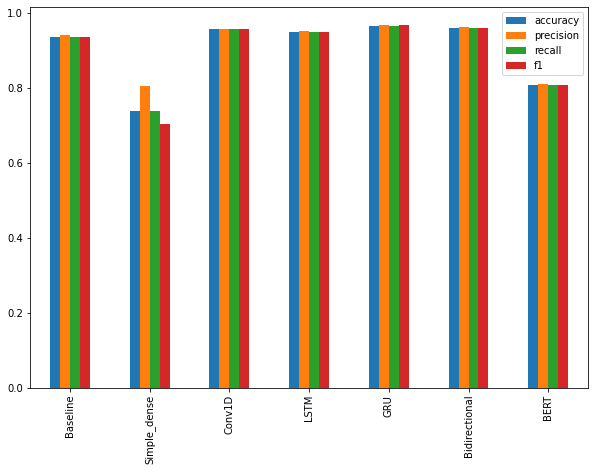

In [408]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

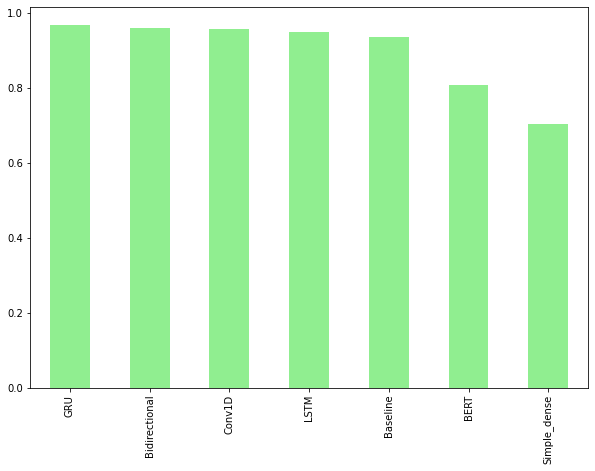

In [409]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7),color='lightgreen');

In [410]:
logging.warning("-"*100)

In [411]:
logging.warning("Save best performing model")

In [412]:
model_4.save('GRU Model')

INFO:tensorflow:Assets written to: GRU Model/assets


In [413]:
import pickle
pickle.dump(model_4, open('gru.pkl','wb'))

# load_model
load_pickle_model = pickle.load(open('gru.pkl','rb'))

INFO:tensorflow:Assets written to: ram://bd6b39bf-5374-4641-ad4d-ada919ffba31/assets


In [422]:
load_pickle_model.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         3187840   
                                                                 
 gru_2 (GRU)                 (None, None, 64)          37248     
                                                                 
 dense_25 (Dense)            (None, None, 128)         8320      
                                                                 
 global_average_pooling1d_14  (None, 128)              0         
  (GlobalAveragePooling1D)                             

In [423]:
load_pickle_model.evaluate(val_dataset)

10/10 [==============================] - 6s 596ms/step - loss: 0.1339 - accuracy: 0.9597


[0.13385872542858124, 0.9597315192222595]

In [425]:
# make prediction using saved_model
pred_proba = load_pickle_model.predict(val_dataset)
preds = tf.argmax(pred_proba, axis=1)
preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 4,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 4, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 1, 1, 3, 4, 4, 0, 4, 3, 2, 2, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 0, 0, 1, 4, 4, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 1, 0, 2, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 4, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 4, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 1, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 1, 2,
       0, 2, 2, 4, 0, 0, 3, 1, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 2, 2, 0, 3,
     

In [ ]:
# !tensorboard dev upload --logdir Model_logs \
#   --name "News Classification Models" \
#   --description "Training results for different models" \
#   --one_shot

In [ ]:
# !tensorboard dev list